<a href="https://colab.research.google.com/github/Abhinavpanjiyar1/100-days-python-projects/blob/main/NEURAL_NETWORK_CLASSIFICATION_WITH_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classification with pytorch


# MAKE CLASSIFICATION DATA AND GET IT READY

In [1]:
import sklearn


In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X ,y =make_circles(n_samples, noise=0.03, random_state= 42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2" : X[:, 1], "label" : y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


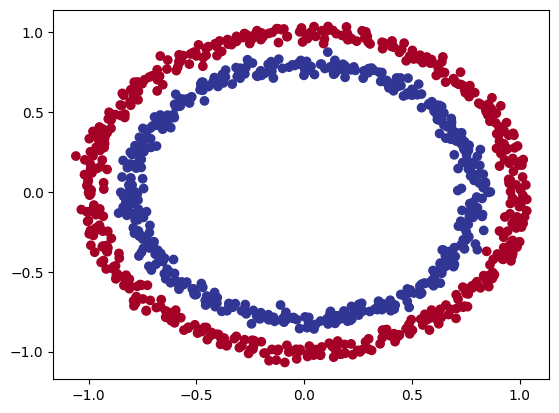

In [5]:
#VISUALIZE,

import matplotlib.pyplot as plt
plt.scatter(x = X[:,0], y = X[:,1], c=y, cmap =plt.cm.RdYlBu);

#check input and output shape

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
#view the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and same for y: {y_sample}")
print(f"value for one sample of X: {X_sample.shape} and same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and same for y: 1
value for one sample of X: (2,) and same for y: ()


In [9]:
#turn data into tensor
import torch
torch.__version__

'2.3.1+cu121'

In [10]:
X.dtype

dtype('float64')

In [11]:
type(X)

numpy.ndarray

In [12]:
#Turn data into tensors

X= torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)


In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

# Building a model
## lets build a model to classify our blue and red dots

In [17]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
X_train



tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [19]:
X_train.shape

torch.Size([800, 2])

In [20]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [21]:
# construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features=1)


  def forward (self, x):
    return self.layer_2(self.layer_1(x))



model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters()).device

device(type='cpu')

In [24]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0421,  0.4477],
                      [-0.4923,  0.6143],
                      [-0.3808, -0.5633],
                      [-0.0416, -0.5069],
                      [-0.4841,  0.4001]])),
             ('layer_1.bias',
              tensor([ 0.5348,  0.2811,  0.6611,  0.4901, -0.4272])),
             ('layer_2.weight',
              tensor([[-0.3121,  0.1599, -0.1851,  0.0339, -0.2291]])),
             ('layer_2.bias', tensor([0.3769]))])

In [25]:
#make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 labesl:\n {y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions:
 tensor([[0.1825],
        [0.2041],
        [0.1996],
        [0.1773],
        [0.3167],
        [0.3290],
        [0.2971],
        [0.3266],
        [0.1946],
        [0.2069]])

First 10 labesl:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [26]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [27]:
# setup loss function and optimizer
import torch.nn as nn # Import the nn module correctly.

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)


In [28]:
# calculate accuracy - out of 100 examples,

def accuracy_fn(y_true, y_pred):
  correct  = torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

# TRAIN A MODEL

In [29]:
# VIEW THE FIRST 5 OUTPUTS OF THE FORWARD PASS ON THE TEST DATA

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits


tensor([[0.1825],
        [0.2041],
        [0.1996],
        [0.1773],
        [0.3167]])

In [30]:
y_test[:5]



tensor([1., 0., 1., 0., 1.])

In [31]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5455],
        [0.5509],
        [0.5497],
        [0.5442],
        [0.5785]])

In [32]:
# find the predicted labels

y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze

tensor([True, True, True, True, True])


<function Tensor.squeeze>

## BUILDING A TRAINING AND TESTING LOOP

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  #loss = loss_fn(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)


if epoch % 10 == 0:
  print(f"Epoch:{epoch} | Loss: {loss: .5f}, Acc: {acc:2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



# make prediction and evaluate the model

In [34]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")

else:
  print("Download helper_functions.py")
  # removed extra https:// from the url
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


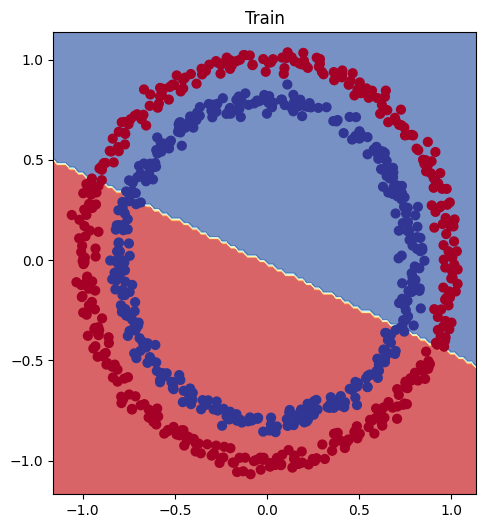

In [35]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
#plt.subplot(1,2,1)
#plt.title("Test")
#plot_decision_boundary(model_0, X_test, y_test)

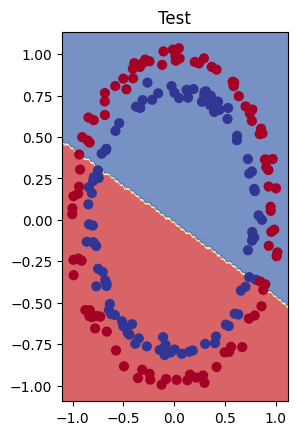

In [36]:
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# IMPROVING A MODEL

In [37]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0739,  0.4394],
                      [-0.5079,  0.6181],
                      [-0.3591, -0.5688],
                      [-0.0399, -0.5069],
                      [-0.4695,  0.3951]])),
             ('layer_1.bias',
              tensor([ 0.5691,  0.2648,  0.6836,  0.4897, -0.4069])),
             ('layer_2.weight',
              tensor([[-0.3628,  0.1923, -0.2344, -0.0249, -0.1337]])),
             ('layer_2.bias', tensor([0.2745]))])

In [38]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features= 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
   # z= self.layer_1(x)
   # z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()


# create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr= 0.1)


In [40]:
#write a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train for longer
epochs = 1000

#put the data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test   = X_test.to(device), y_test.to(device)

for epochs in range(epochs):
  ## training
  model_1.train()

  #forward pass

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train, y_pred = y_pred)

  #optimizer zero grad
  optimizer.zero_grad()


  #loss backward (back propogation)
  loss.backward()

  #optimizer step(gradient descent)
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    #forward passs
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate loss

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)


    # print out what happening





In [41]:
if epoch % 100 ==  0:
  print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc; {acc:.2f}% | Test loss; {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")


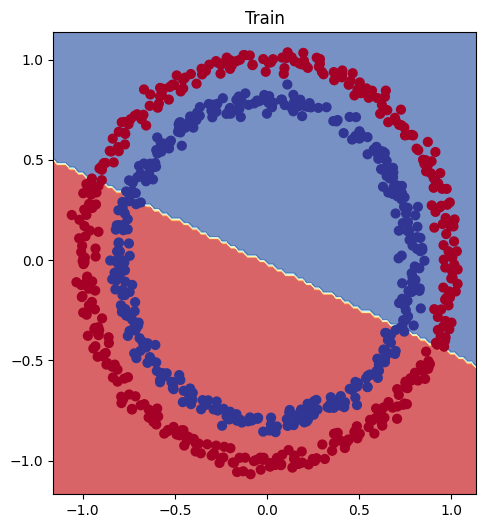

In [42]:
# plot decision boundary of the model

plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

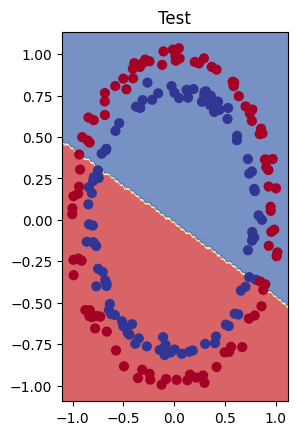

In [43]:
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# preparing data to see if our model can fit a straight line

In [44]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [45]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


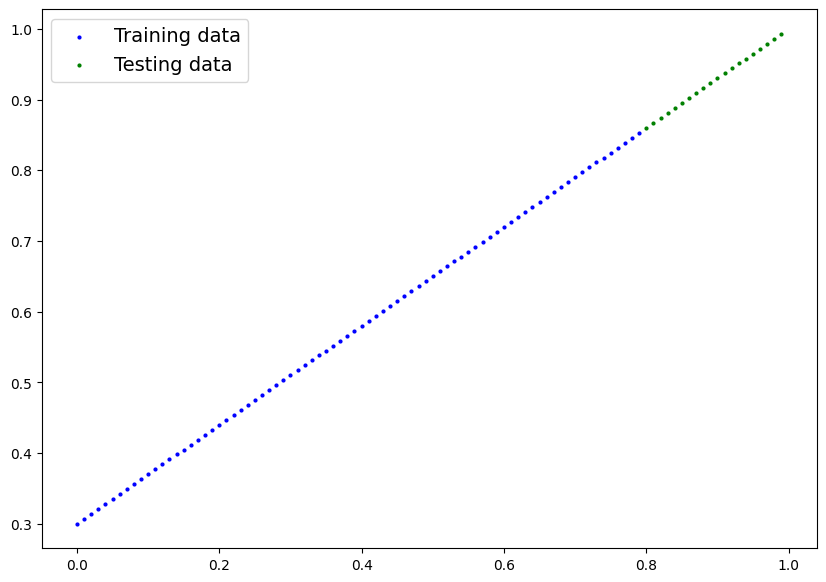

In [46]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression);


In [47]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
## adjust model1 to fit a straight line

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features=10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
## loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr= 0.01)


In [50]:
# train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put the data on the target device
X_train_regression, y_train_regression= X_train_regression.to(device),  y_train_regression.to(device)
X_test_regression ,y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

    #print out
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}) | Test loss: {test_loss: .5f}")


Epoch: 0 | Loss: 0.75986) | Test loss:  0.91103
Epoch: 100 | Loss: 0.02858) | Test loss:  0.00081
Epoch: 200 | Loss: 0.02533) | Test loss:  0.00209
Epoch: 300 | Loss: 0.02137) | Test loss:  0.00305
Epoch: 400 | Loss: 0.01964) | Test loss:  0.00341
Epoch: 500 | Loss: 0.01940) | Test loss:  0.00387
Epoch: 600 | Loss: 0.01903) | Test loss:  0.00379
Epoch: 700 | Loss: 0.01878) | Test loss:  0.00381
Epoch: 800 | Loss: 0.01840) | Test loss:  0.00329
Epoch: 900 | Loss: 0.01798) | Test loss:  0.00360


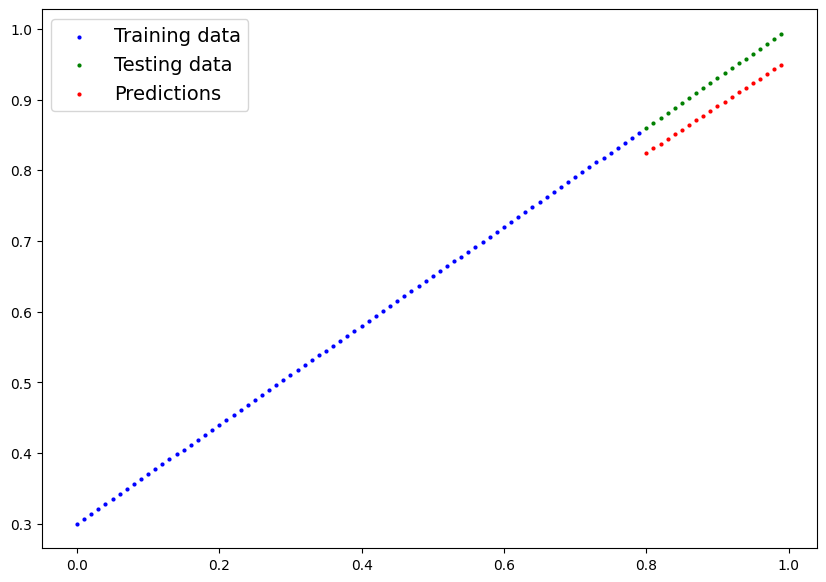

In [51]:
# turn on evaluation mode
model_2.eval()

#make prediction
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

  #plot data and predictions

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 predictions = y_preds.cpu())


# THE MISSING PIECE NON LINEARITY

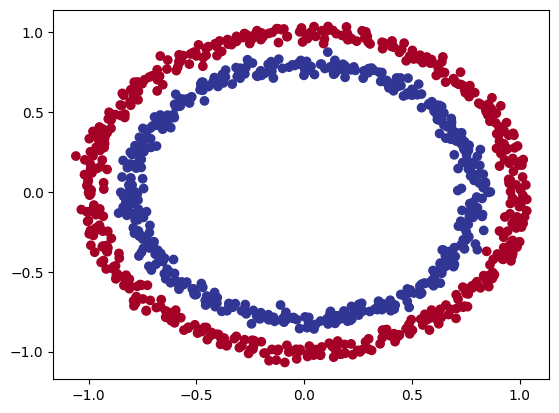

In [52]:
## Recreating non linearity
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

In [53]:
# convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split into train and test sets

X_train, X_test, y_train ,y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state =42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## building a model with non linearity
linear =straight line
non_lineear = non -straight line

In [54]:
## building a model with non linearity

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features =10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() #relu is a non linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [55]:
# setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)


# Training our model with non linearity

In [56]:
## training our model with non linearity

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device

X_train, y_train =X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# loop through the data
epochs = 1000


for epoch in range(epochs):
  ## training
  model_3.train()

  # forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate the loss

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #step the optimizer
  optimizer.step()

  #testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)


    #print out
    if epoch % 100 == 0:
      print(f"Epoch; {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test loss: {test_loss:.4f}, Test Acc : {test_acc:.2f}")




Epoch; 0 | Loss: 0.6929, Acc: 50.00 | Test loss: 0.6932, Test Acc : 50.00
Epoch; 100 | Loss: 0.6912, Acc: 52.88 | Test loss: 0.6910, Test Acc : 52.50
Epoch; 200 | Loss: 0.6898, Acc: 53.37 | Test loss: 0.6894, Test Acc : 55.00
Epoch; 300 | Loss: 0.6879, Acc: 53.00 | Test loss: 0.6872, Test Acc : 56.00
Epoch; 400 | Loss: 0.6852, Acc: 52.75 | Test loss: 0.6841, Test Acc : 56.50
Epoch; 500 | Loss: 0.6810, Acc: 52.75 | Test loss: 0.6794, Test Acc : 56.50
Epoch; 600 | Loss: 0.6751, Acc: 54.50 | Test loss: 0.6729, Test Acc : 56.00
Epoch; 700 | Loss: 0.6666, Acc: 58.38 | Test loss: 0.6632, Test Acc : 59.00
Epoch; 800 | Loss: 0.6516, Acc: 64.00 | Test loss: 0.6476, Test Acc : 67.50
Epoch; 900 | Loss: 0.6236, Acc: 74.00 | Test loss: 0.6215, Test Acc : 79.00


In [57]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.927

## evalauting a model trained with non-linear activation functions

In [58]:
# make predictions

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

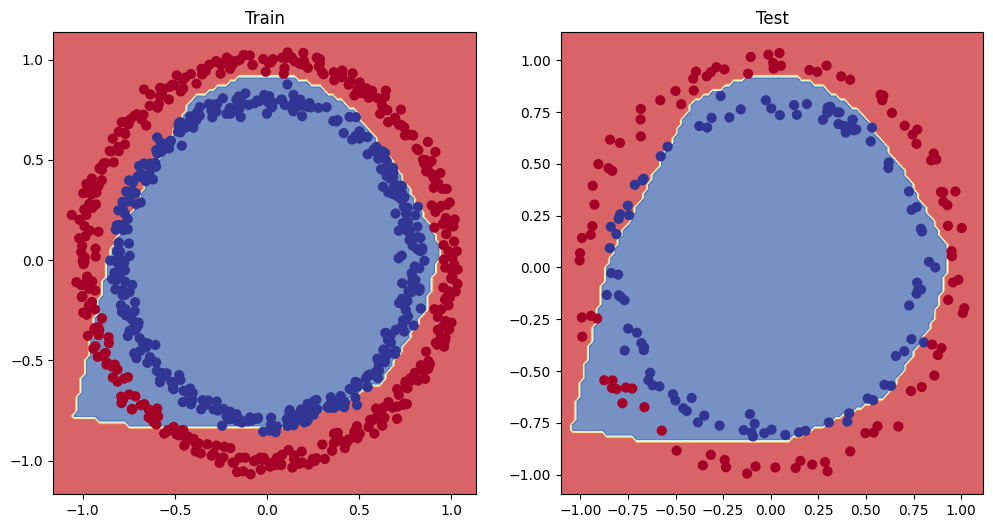

In [59]:
# plot the decision boundary
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


## replicating non-linear activation function

In [60]:
## Create a tensor

A =torch.arange(-10, 10, 1, dtype = torch.float32)
A.dtype



torch.float32

In [61]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

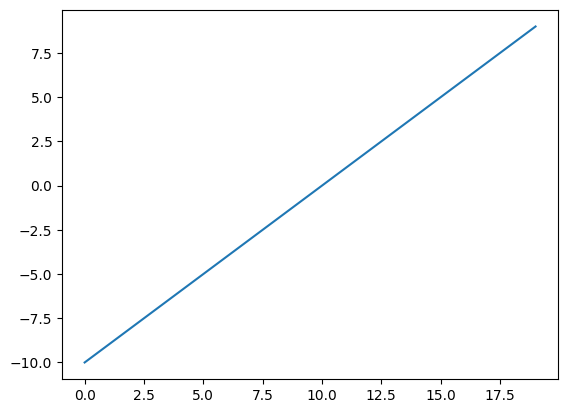

In [62]:
# visualize the tensor

plt.plot(A);


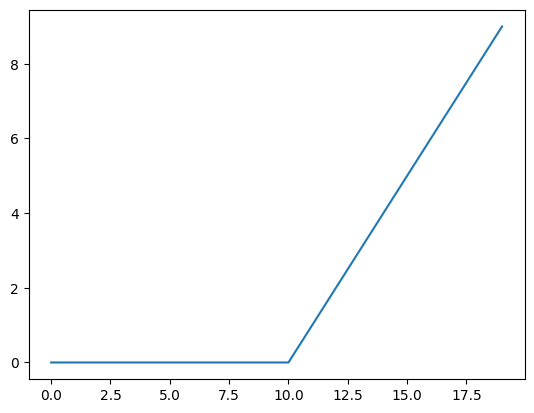

In [63]:
plt.plot(torch.relu(A))

In [64]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

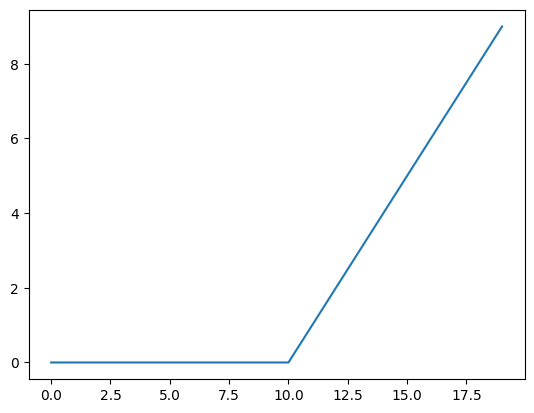

In [65]:
# Plot ReLU activation functions

plt.plot(relu(A));

In [66]:
# Nows let do the same for sigmoid

def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


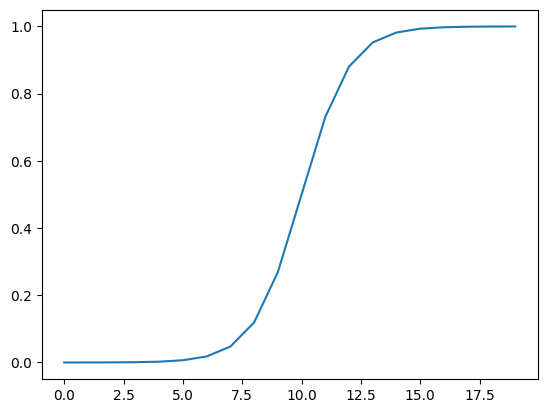

In [67]:
plt.plot(torch.sigmoid(A));

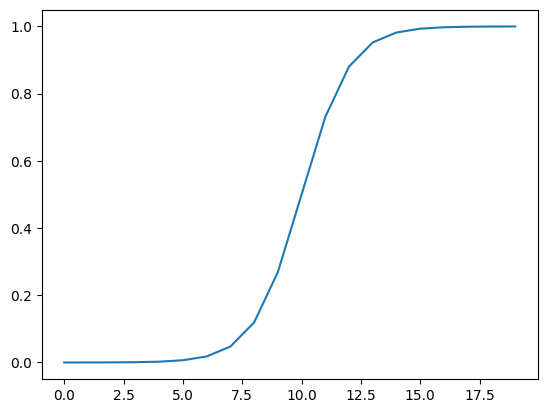

In [68]:
plt.plot(sigmoid(A));

## Putting it all together with a multi-class classification problem

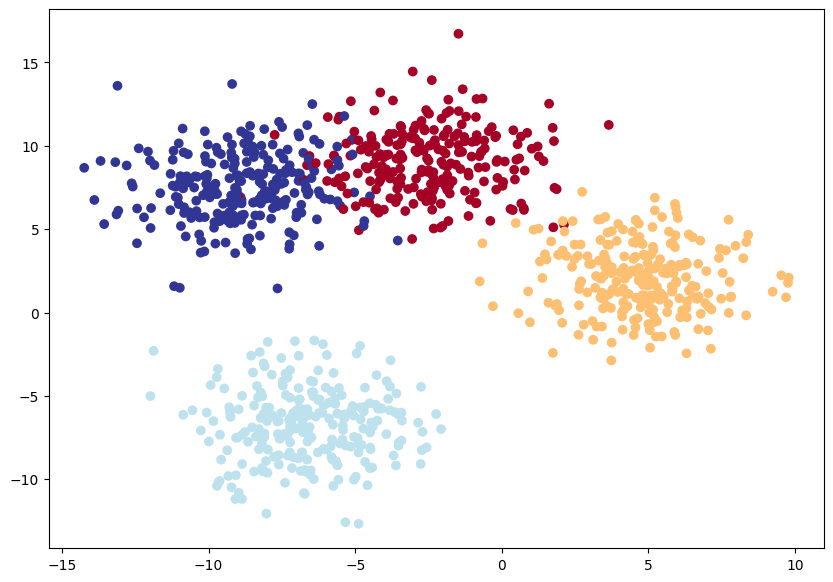

In [69]:
# Creating a toy multi-class dataset

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyper parameters for data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#create multi-class data
X_blob ,y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 2,
                            random_state =RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)


#split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state = RANDOM_SEED)

# plot data(visualize, visualize, visualize)

plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0] , X_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)




In [70]:
#Building a multi-class classification model in pytorch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [71]:
#Building a multi-class classification model in pytorch

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """ Initialize the multi-class classification model
    Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
    super().__init__()
    self.linear_layer_stack = nn.Sequential (
        nn.Linear(in_features=input_features, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = hidden_units ),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward (self, x):
    return self.linear_layer_stack(x)


  # create a instance of blobmodel and send it to  the target device

model_4 = BlobModel(input_features = 2,
                      output_features = 4,
                      hidden_units = 8). to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [72]:
X_blob_train.shape, y_blob_train[:5]


(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [73]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

In [74]:
# create a loss function and optimizer for a multi class classification

loss_fn = nn.CrossEntropyLoss()

#create a optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)


In [75]:
# get some raw data
model_4.eval()
with torch.inference_mode():
  y_preds = model_4(X_blob_test.to(device))

y_logits[:10]


tensor([ 0.2165, -0.4163, -0.1776, -0.0779,  0.2054,  0.1353,  0.1392,  0.1694,
        -0.2816, -0.7396], grad_fn=<SliceBackward0>)

In [76]:
y_blob_test[:10]


tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [77]:
# convert our mdoel logits output tot prediction probabilities

y_pred_probs = torch.softmax(y_logits.unsqueeze(1), dim =1 )
print(y_logits[:5])
print(y_pred_probs[:5])


tensor([ 0.2165, -0.4163, -0.1776, -0.0779,  0.2054], grad_fn=<SliceBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)


In [78]:
y_preds = torch.argmax(y_pred_probs, dim =1)
y_preds


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

## creating a training loop and testing loop for a multi class pytorch model

In [81]:
# fit the multi class model to the data

torch.manual_seed(42)
torch.cuda.manual_seed(42)


# set the number of epochs
epochs = 100

#put the data to the target device

X_blob_train , y_blob_train = X_blob_train.to(device), y_blob_train.to(device).long()
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device).long()

#loop through the data
for epoch in range(epoch):
  #training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim =1)


  loss = loss_fn(y_logits, y_blob_train)
  acc= accuracy_fn(y_true = y_blob_train,
                   y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  #testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim =1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_pred)

    #print it out
  #if epoch % 10 == 0:
    #print(f"Epoch; {epoch} | Loss: {loss: .4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


In [82]:
  if epoch % 10 == 0:
    print(f"Epoch; {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")


Epoch; 0 | Loss: 1.0519, Acc: 63.00% | Test loss: 0.5976, Test acc: 86.50%


# making and evaluating prediction with a pytorch mulit-class model

In [84]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_pred_probs[:10]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)

In [85]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[0.3486, 0.4562, 0.0410, 0.1541],
        [0.4177, 0.0084, 0.1189, 0.4551],
        [0.0632, 0.0184, 0.8050, 0.1133],
        [0.2741, 0.4452, 0.1193, 0.1614],
        [0.5887, 0.0996, 0.0260, 0.2858],
        [0.4001, 0.0031, 0.1019, 0.4949],
        [0.0618, 0.0459, 0.7970, 0.0953],
        [0.5516, 0.0486, 0.0479, 0.3519],
        [0.0493, 0.0038, 0.8293, 0.1175],
        [0.5648, 0.0662, 0.0406, 0.3284]])

In [88]:
# go from pred prob to pred labels

y_preds = torch.argmax(y_pred_probs, dim =1) # Use y_pred_probs instead of y_preds_probs
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

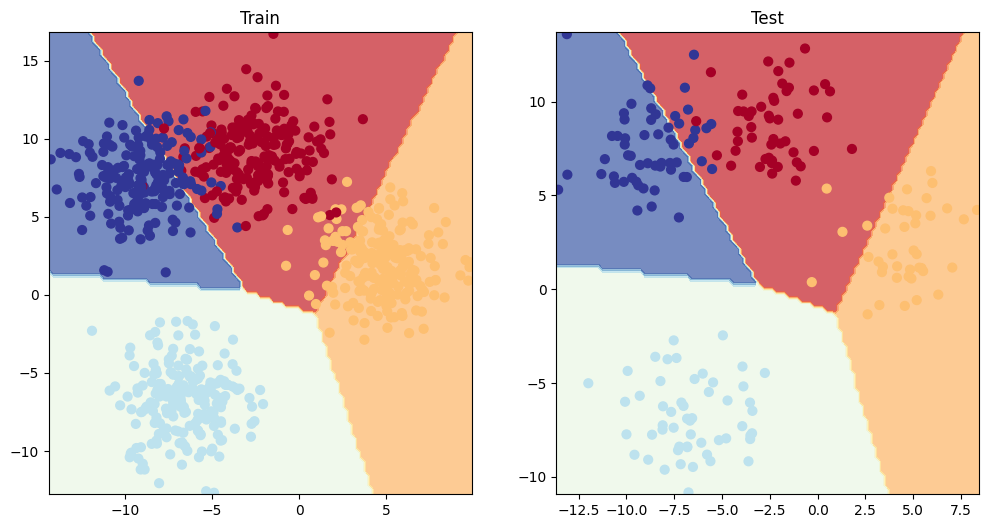

In [89]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


# A few more classification metrices